# Section 1 - X

## Section 1

### Database Design Process

We ask ourselves these 3 questions typically to help us set up our database.

<img src=attachment:4d959bb1-214c-4d2b-b03c-c3f272855a68.png width=600 />

What are tables? We are only going to store data inside our database inside of tables. A table contains many records. Each record inside our table is referred to as a row.

<img src=attachment:f3248545-0758-4925-836e-ea3c97289b7f.png width=700 />

### Creating/Inserting into a Table

<img src=attachment:790477d9-a58a-4ad8-abdd-246669a9d340.png width=600 />

`VARCHAR(50)` is short for 'variable characters' tells us that we never expect to store a string longer than 50 characters, otherwise we'll get an error.

`INTEGER` are numbers between -2,147,483,647 to 2,147,483,647. We can't have bigger or smaller, otherwise error.

We can try out SQL code on the website: https://pg-sql.com/

To insert into our table, we use `INSERT INTO <name of table>(<column titles, comma separated>)` and `VALUES (<strings or integer values corresponding to the columns of our data>);`, e.g.  

```
INSERT INTO cities(name, country, population, area)
VALUES ('Tokyo', 'Japan', 38505000, 8223);
```

Values have to be provided in correspondence with `INSERT INTO`'s line. 

**We must have the `INSERT INTO` line every time we want to add records to our tables.**

### Retrieving Data with SELECT

Looking at the table we created above called cities, we retrieve all columns with the queries:

`SELECT * FROM <table name>` `SELECT <specific column names, comma-separated> FROM <table>`.

e.g. 

`SELECT name, population FROM cities;`. We can list the same column headings multiple times or play around with the order. We'll see an example of why this can be useful.

### Performing Calculations Before Pulling From Database

We had columns population and area for our `cities` table. Now let's say we want to calculate the population density for each row. We do this by imagining that we are creating a temporary column from our actual columns. We do this by writing:

`SELECT name, population / area FROM cities;` : These columns in postgres are labelled `?column?` because they're temporary columns, but we can rename it using the `AS` keyword.

```
SELECT name, population / area AS population_density
FROM cities;
```

### String Operators and Functions

Here are the string operators and functions:

<img src=attachment:f9b2fa82-2967-4a16-8358-5a106c9fc5c7.png width=800 />

Here's an example:

`SELECT name || country FROM cities` - This joins together the cities and countries together as an undefined/temporay column e.g. TokyoJapan.

To format this better, we can change our code to:

`SELECT name || ', ' || country FROM cities;` - which outputs Tokyo, Japan. Don't forget that we can define this column with the `AS` keyword.

We can also use CONCAT():

`select CONCAT(name, ', ', country) AS location FROM cities;`

Finally, we can combine functions intuitively e.g. `CONCAT(UPPER(name)...)...`

## Section 2

### Filtering rows given some criteria using the 'WHERE' keyword: 

We can filter our data using `SELECT <column x> FROM <table> WHERE <condition>;`

e.g. `SELECT name, area from cities WHERE area > 4000;`

An extremely important point to note is understanding the order in which postgres interprets the keywords:

<img src=attachment:66bdce4a-cacb-4c63-a2c3-1af11e460e19.png width=750 />

- It first looks in the `cities` table.
- Then, it says, for each row does it have a column with area above 4000?
- Then we select the column that we want from this filtered data.

Here are all the comparison operators:

<img src=attachment:023ebb97-ab5a-4bbb-a610-82caf243ba18.png width=750 />
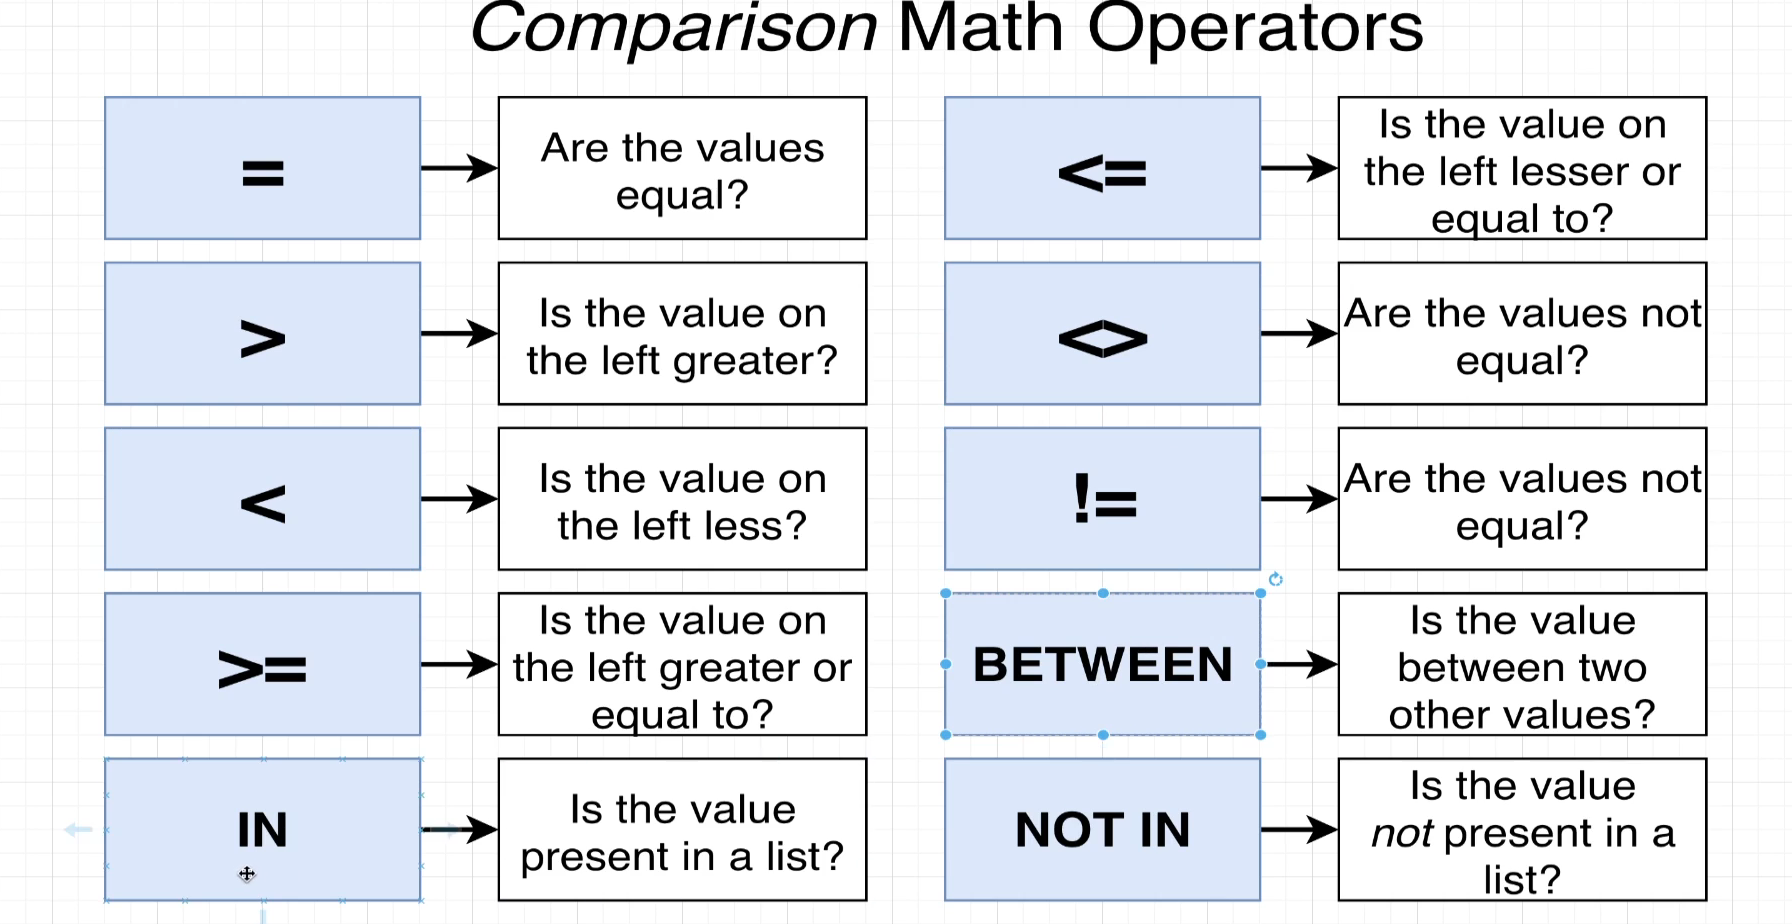

Here's an example with `BETWEEN`:

```
SELECT
    name,
    area
FROM
    cities
WHERE
    area BETWEEN 2000 and 4000
```

Here's an example with `IN`:

```
SELECT
    name,
    area
FROM
    cities
WHERE
    name IN ('Delhi', 'Shanghai');
```

This looks for every city within our specified list ('Delhi', 'Shanghai'). They don't need to be strings - we can search for specific integers too.

Multiple conditions can be done easily with the `AND`/`OR` keywords.

```
WHERE 
    area NOT IN (3043, 8223) 
    AND name = 'Delhi'
    OR name = 'Tokyo';
```

Note that AND has precedence over OR so `WHERE a1 OR a2 AND b,` is interpreted as `WHERE a1 or (a2 AND b)`. In general, use parentheses to make it clear.

### Updating Rows

When we want to update records, we don't use the `SELECT` keyword because we're not fetching any data, we're only trying to update.

`UPDATE <table> SET <column heading> = <value> WHERE <condition`

Example: `UPDATE cities SET population = 39505000 WHERE name = 'Tokyo';`

### Deleting Rows

Here we use: - `DELETE FROM <table> WHERE <condition>;`: Deletes the entire row of any record satisfying the condition.

e.g. `DELETE FROM cities WHERE name = 'Tokyo';`

## Section 3

### Approaching Database Design (Multiple Tables)

Here is something more realistic:

<img src=attachment:f101423a-322e-40be-82c1-fa97f5608207.png width=700 />
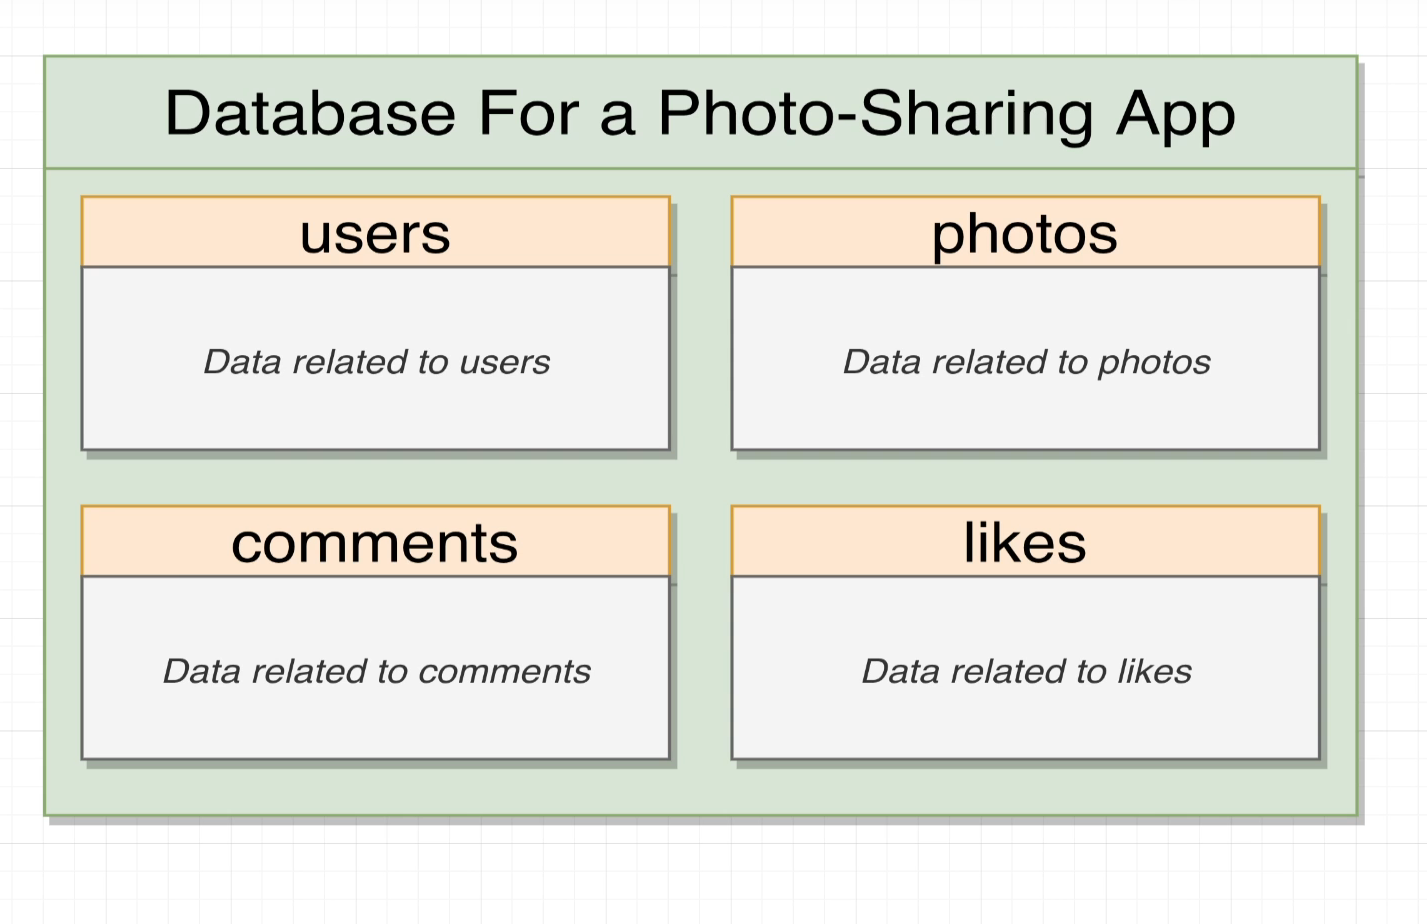

**If the feature is widely used, we can google to find the appropriate structure (schema) e.g. for an upvoting/downvoting system, we could google: SQL scheme upvote system.**

**If the feature is new, we should start by creating a separate table for each of these features; features that seems to indicate a relationship/ownership need to be reflected in our table design**

Here's an example for an Instagram account :

<img src=attachment:ca785eb0-6334-471d-beb9-c8265346dd6a.png width=700 />

We note that there is a relationship between users; users can follow others but not themselves. We also note that users *own* those photos.
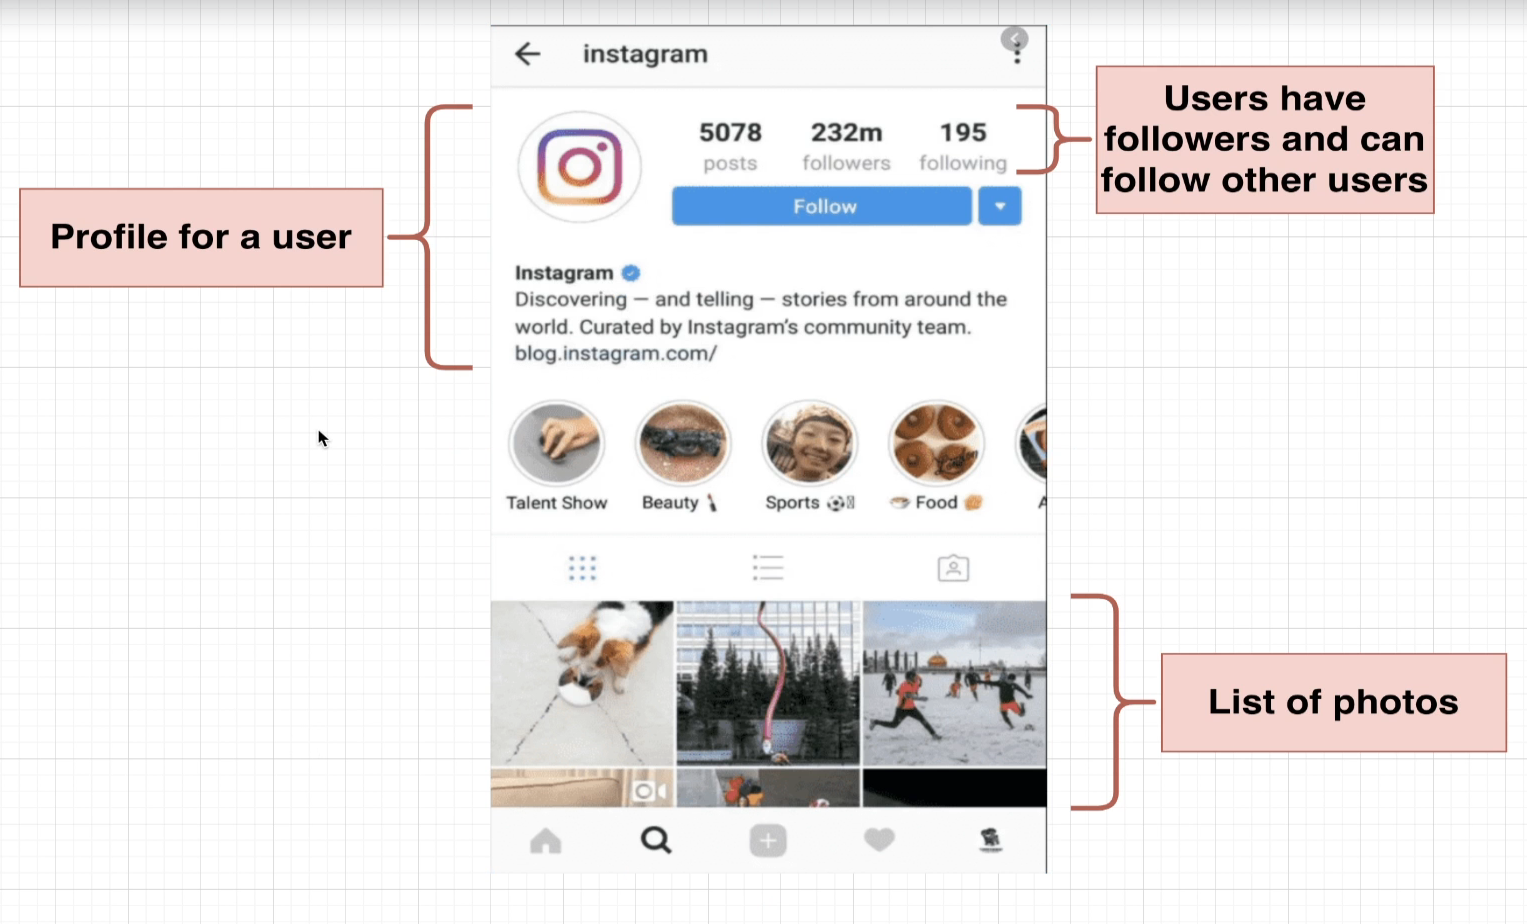

Here's an example of an Instagram post:

<img src=attachment:dad79093-e70a-4591-a241-251eeb46e899.png width=700 />

We note that comments are specifically intended for that photo/post. There's also a relationship between a user and a 'like' resource, and a 'like resource' and a photo. 

We can loosely describe these relationships:

<img src=attachment:0c5e061d-0145-422c-bb11-ec0703198457.png width=750 />
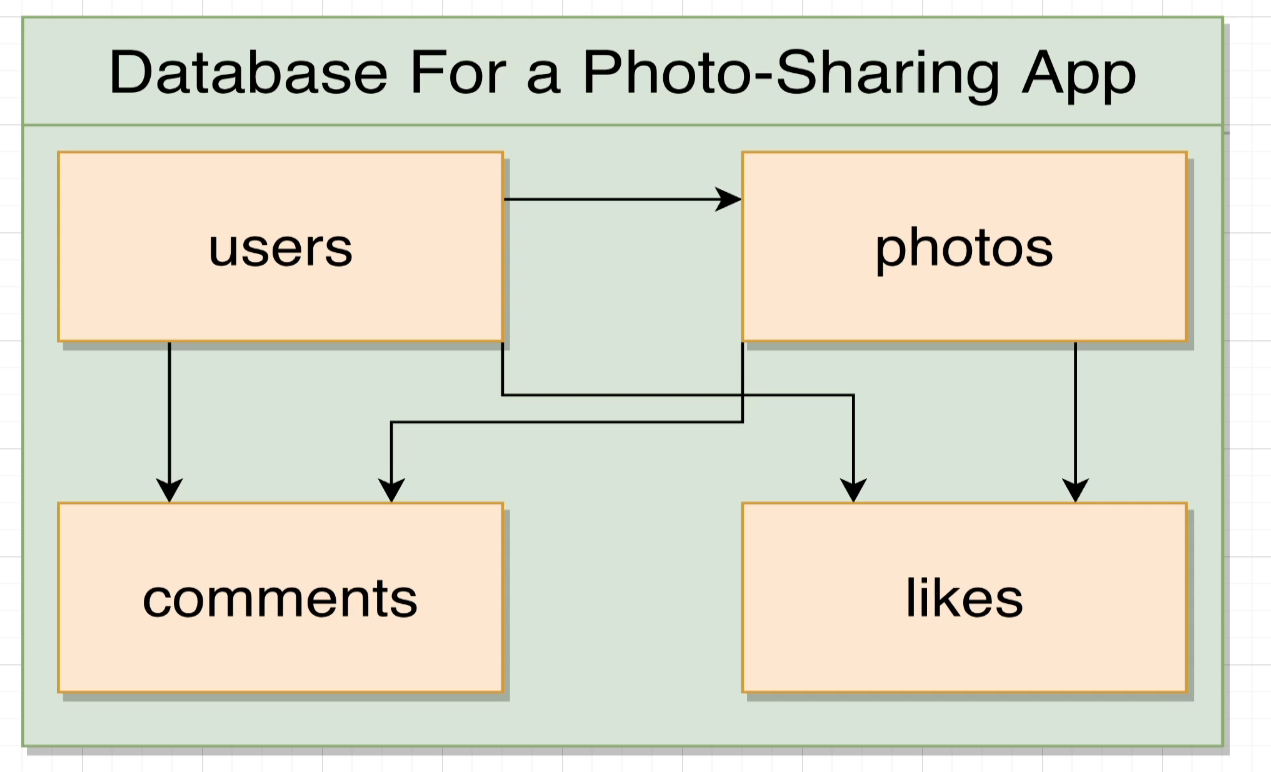
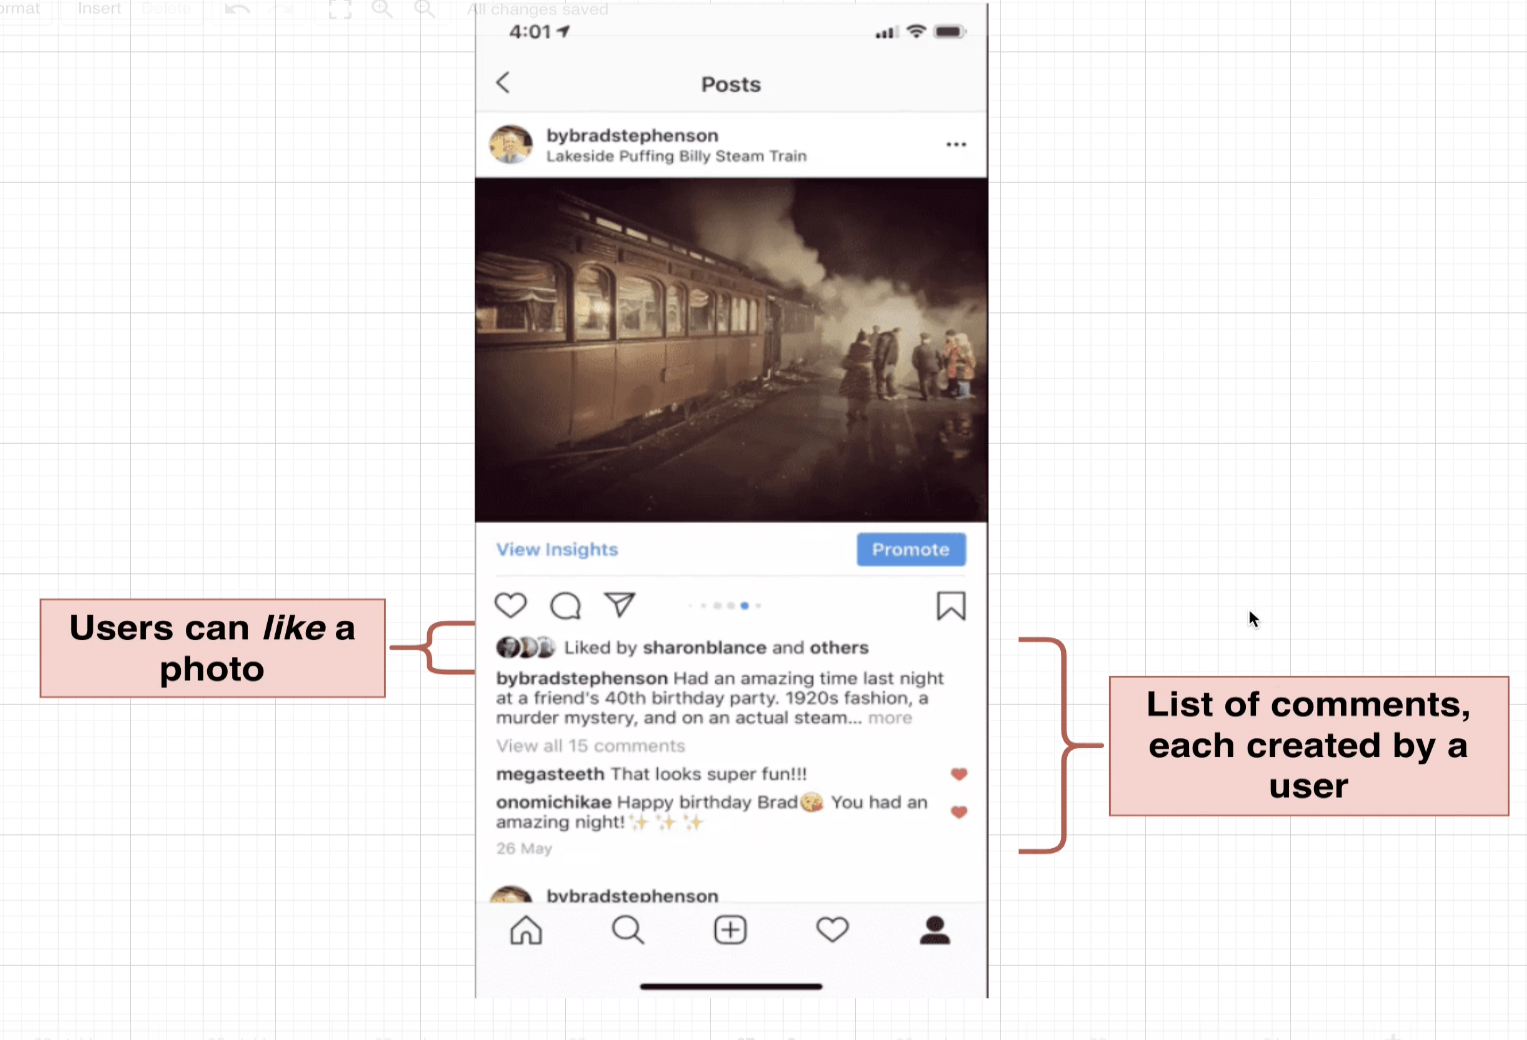

There are **4 different kinds of relationships** that we can make between records in SQL.

- One-to-Many: (a user has many photos)
- Many-to-One: (many photos have one user - technically we say a photo has one user because this indicates that a photo cannot have multiple users)
- One-to-One: (a boat has one captain, a company has one CEO, a person has driver's license)
- Many-to-Many: (students have many classes + classes have many students, players have many matches + matches have many players etc.)

To reflect these relationships we need **primary keys** and **foreign keys**.

### Primary and Foreign Keys

Primary and foreign keys are additional columns added to many tables that we create. Every single table we make will have a primary key (column)

**Primary key**: The goal of this is to uniquely identify a row in a given table. Therefore, all rows in a given table have a unique primary key.

**Foreign key**: The goal of this is to somehow relate a row in one table to some other row in a different table, or even the same table.

<img src=attachment:55f2859c-2c21-4812-bb05-b74d70f73a6e.png width=700 />



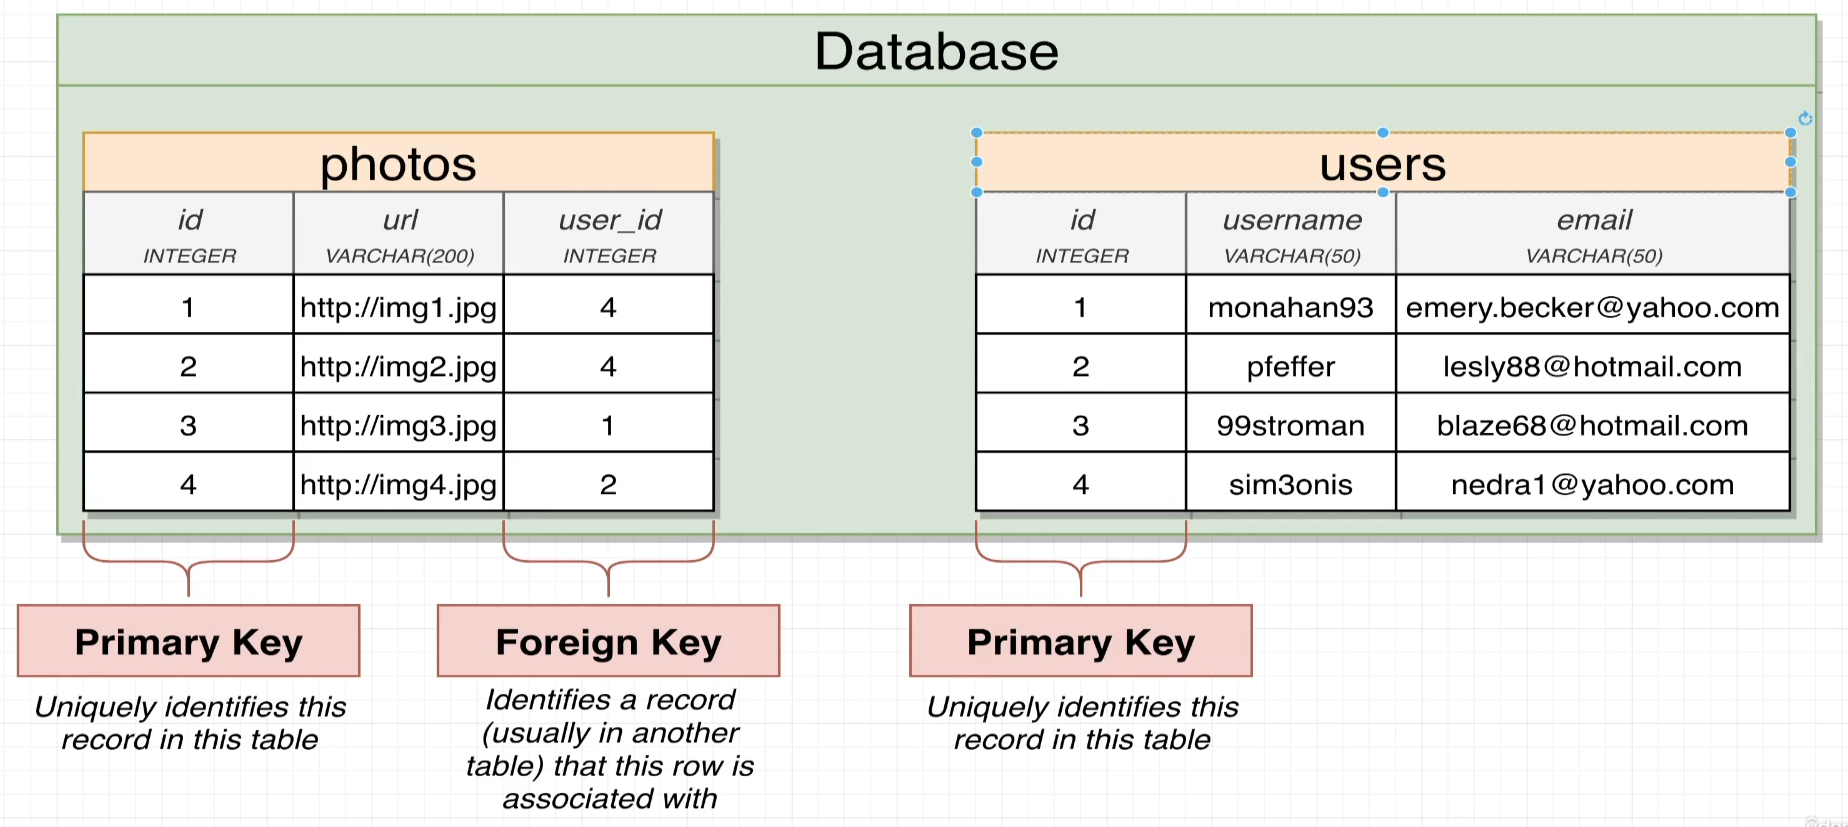

The photos table's foreign key column tells us that the first two photos with `user_id = 4` is somehow related to the user with `id = 4`, i.e. sim3onis. **This is how we implement a one-to-many and many-to-one relationship**. Remember that these two relationships are very similar - it just depends on the perspective.

How do we decide which table gets the foreign key column?

Let's take a look at the Instagram example:

<img src=attachment:c333137a-e0bb-4c25-96b8-a0ada58d90b3.png width=700 />
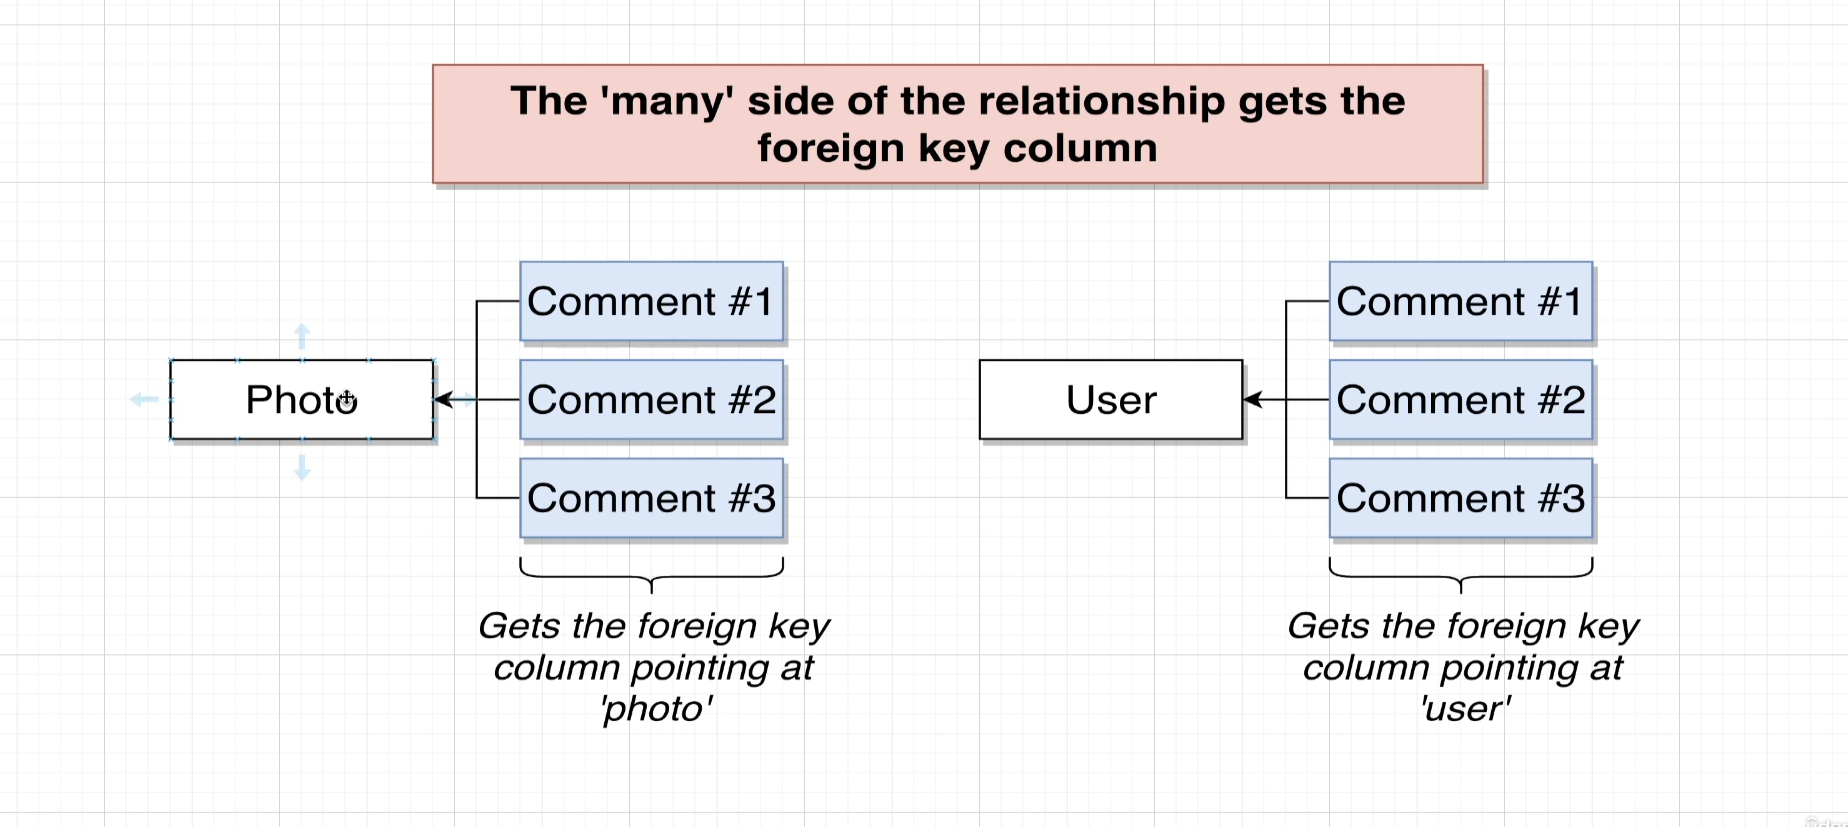

**The 'many' side of the relationship gets the foreign key column**

<img src=attachment:118b4d5f-12ce-4c38-b254-e13ee72dd858.png width=700 />

Here we can see that comments has two owners, both of which have a many-to-one type relationship from the perspective of the comment, so the comments table has two foreign key columns.

Also, photos have a many-to-one relationship with users, so photos table gets the foreign key column.
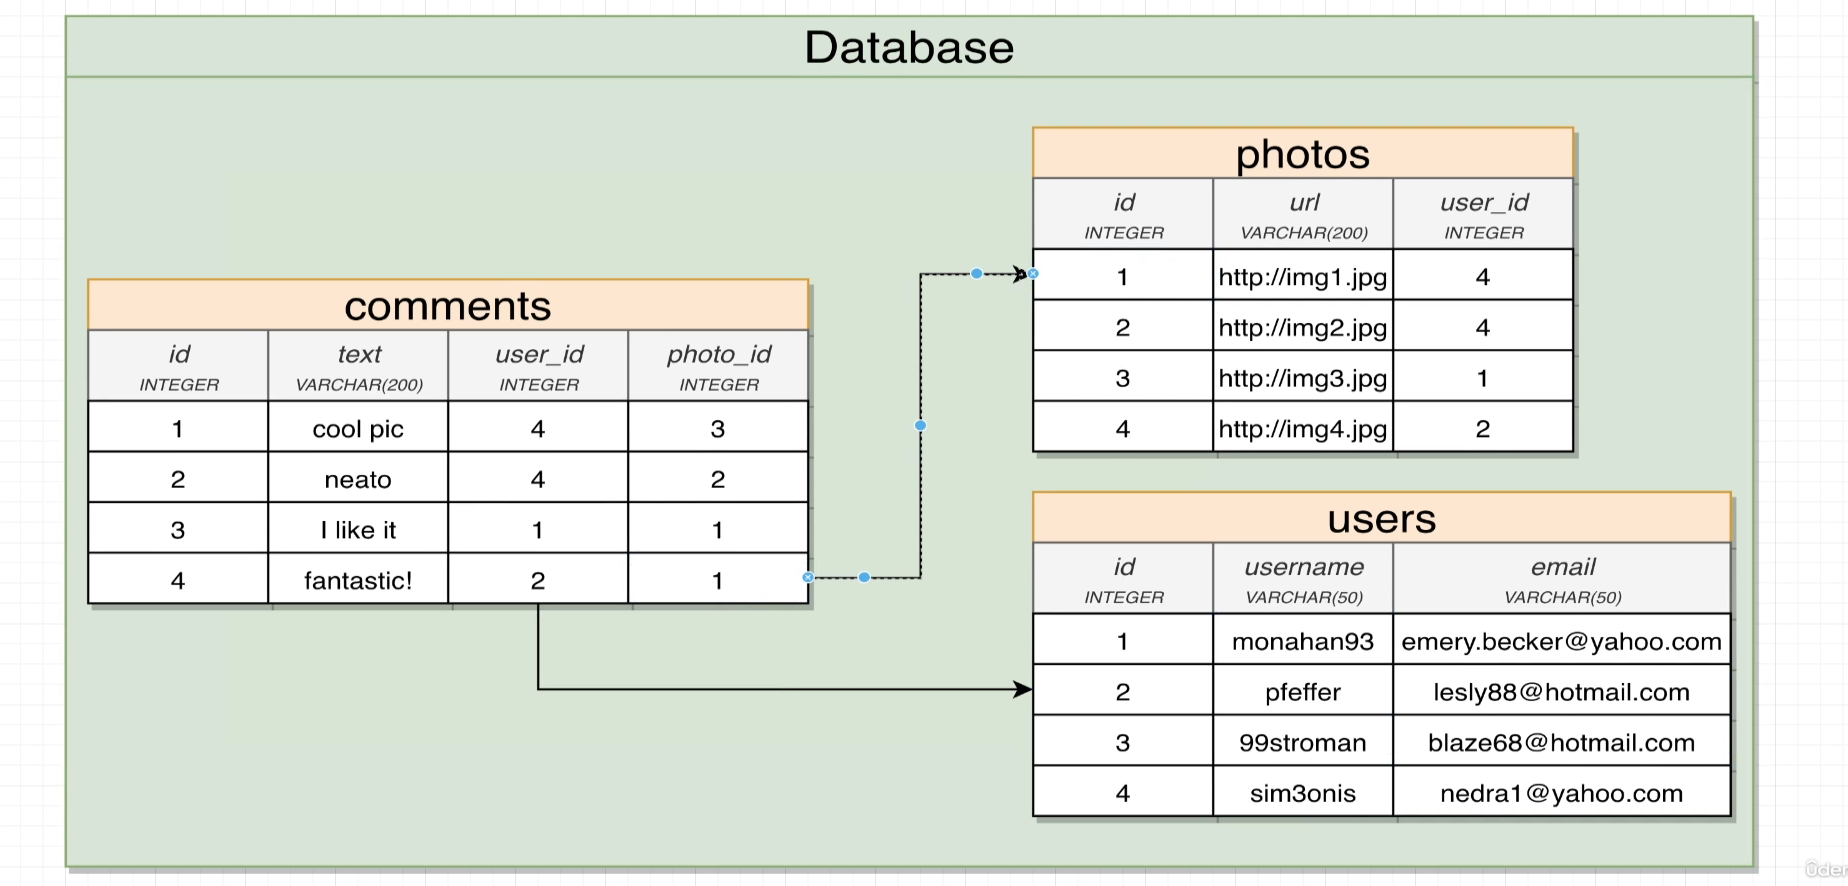

The table below summarises the properties of the two types of keys:

<img src=attachment:a30f7528-835c-44d7-9da6-749e50b4f649.png width=750 />
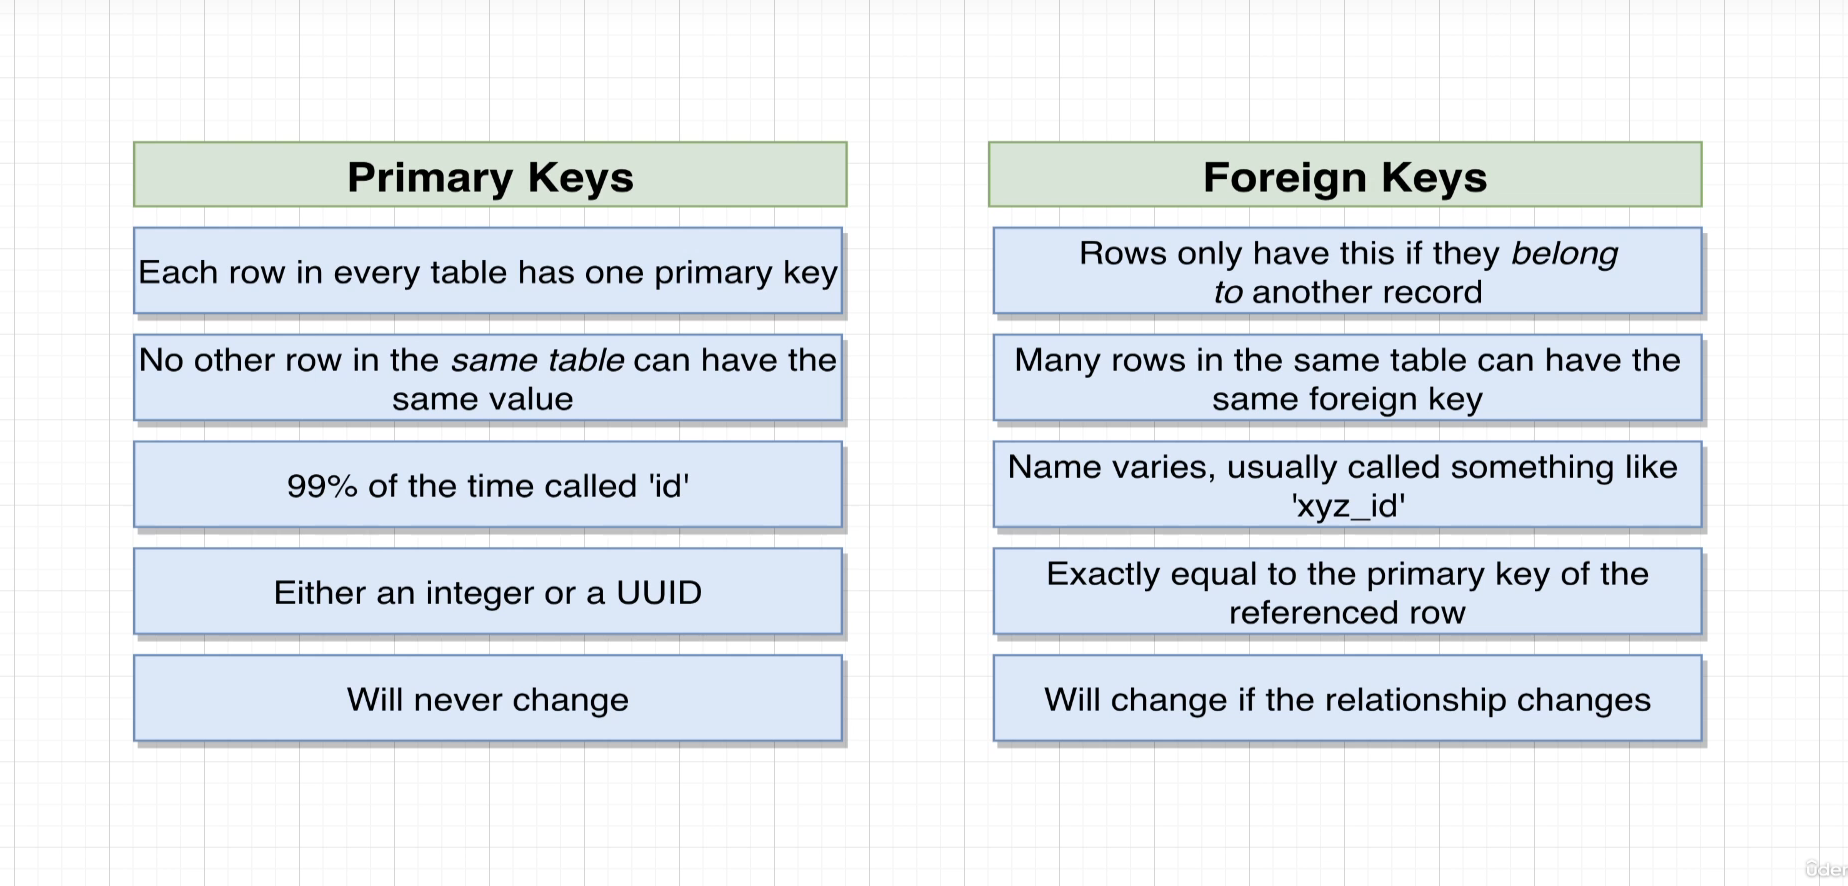

### Creating primary and foreign key columns in SQL

**Primary keys** : To automatically give each of our rows a primary key, we can use the keyword `SERIAL` (instead of something like VARCHAR(50) or INTEGER). This means we don't need to provide the ID; as soon as we generate a row of data, SQL will automatically generate a unique ID. After `SERIAL` we can add the `PRIMARY KEY` keyword which gives us performance benefits.

```
CREATE TABLE users (
    id SERIAL PRIMARY KEY,
    username VARCHAR(50)
);
```

If we want to insert rows into this, we don't need to provide the id column because of the `SERIAL` keyword. Also `id` in the above is not a keyword - we could call it `idd` if we wanted.

```
INSERT INTO users (username)
VALUES
    ('john'),
    ('paul'),
    ('george'),
    ('ringo');
```

**Foreign keys**: To make a foreign key column we need the `REFERENCES` keyword as well as the table and column that it's referencing. Here's an example:

```
CREATE TABLE photos (
    id SERIAL PRIMARY KEY,
    url VARCHAR(200),
    user_id INTEGER REFERENCES users(id)
);
```

Now let's insert a row that has a foreign key. This row will belong to user 4.

```
INSERT INTO photos (url, user_id)
VALUES 
    ('http://one.jpg', 1),
    ('http://121.jpg', 1),
    ('http://423.jpg', 1),
    ('http://223.jpg', 2),
    ('http://321.jpg', 3),
    ('http://534.jpg', 4),
    ('http://453.jpg', 4);
```

### Querying and the keyword `JOIN`

Now let's write a query to retreive all photos created by user 4: `SELECT * FROM photos WHERE user_id = 4;`

The`JOIN` statement is one of the most difficult concepts to understand in SQL. We'll introduce it without explanation now and see it in more detail later.

Firstly, let's take a look at the query:

```
SELECT url, username FROM photos
JOIN users on users.id = photos.user_id;
```

Output: 

<img src=attachment:bb5d4b31-1cdf-4656-9c17-ee069ff01a18.png width=600 />

Note:
- `url` is from the `photos` table while `username` is from the `users` table.
- The `JOIN` statement above is combining together the definitions of the two different tables.
- This query is useful for finding the photos associated with a given user (e.g. instagram).

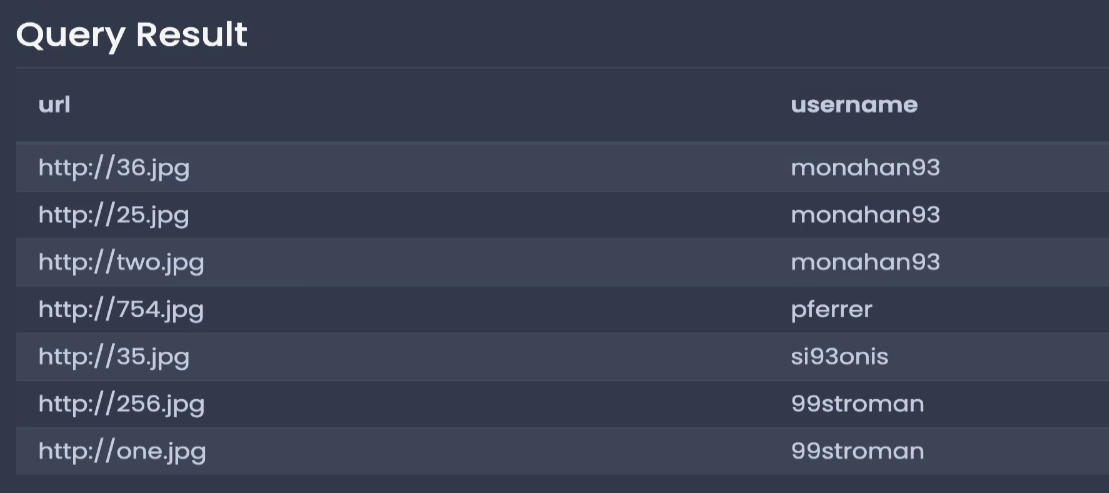

**Section 3**

-`id SERIAL PRIMARY KEY`: Creates a column of primary keys with unique IDs that are auto-incremented and auto-generated.
- `<owner's column>_id INTEGER REFERENCES <owner's table>(<primary key of owner, usually 'id'>)`: Create a foreign key column that is owned by some owner in a different table. 

## Section 4

## Section 5

## Section 6

## Section 7

## Section 8

## Section 9

## Section 10

## Summary of keywords

**Section 1** 

- `CREATE TABLE <name of table>();` : creates table.
- `INSERT INTO <name of table>(<column titles (comma separated)>)`: add columns for the data that we're going to provide. (no semi colon because line is not over)
- `VALUES (<strings or integer values corresponding to the columns of our data>);` : Add 1 row (now add semicolon to end the line).
- 
```
VALUES 
    (<strings or integer values corresponding to the columns of our data>),
    (<strings or integer values corresponding to the columns of our data>),
    (<strings or integer values corresponding to the columns of our data>);`
```
: Add multiple rows.
- `SELECT * FROM <table name>`: select all columns from our table.
- `SELECT <specific column names, comma-separated> FROM <table>`: select specific columns from our table
- `SELECT <column x> <operator> <column y> FROM <table>;` perform calculations for each row e.g dividing population column by area column to get density column for all rows. 
- `SELECT <column x> <operator> <column y> AS <new name> FROM <table>;` : give column title to the temporary column
- `SELECT UPPER(CONCAT(name, ', ', country)) AS location FROM cities;`: example of combining functions

**Section 2**

- `SELECT <column x> FROM <table> WHERE <condition>;`: Filter our data based on a condition e.g. `WHERE area > 4000`.
- 
```
WHERE
    <condition one>
    AND/OR <condition two>
    AND/OR <condition three>;
```
: Filter for multiple conditions
- `UPDATE <table> SET <column heading> = <value> WHERE <condition;` : Update a record based on some condtion.
- `DELETE FROM <table> WHERE <condition>;`: Deletes the entire row of any record satisfying the condition.

# Section X - Y

In [ ]:
f